___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part - 2<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Time Series Generator)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

Datasetimizde birden fazla feature olacak ve bunların etkilerini de targetımızda görmek istiyoruz işte bunlar multivariate time series oluyor

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

In [7]:
df = pd.read_csv('energydata_complete.csv',index_col='date', parse_dates = True)

In [8]:
df.head() # 10 dkde bir 

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


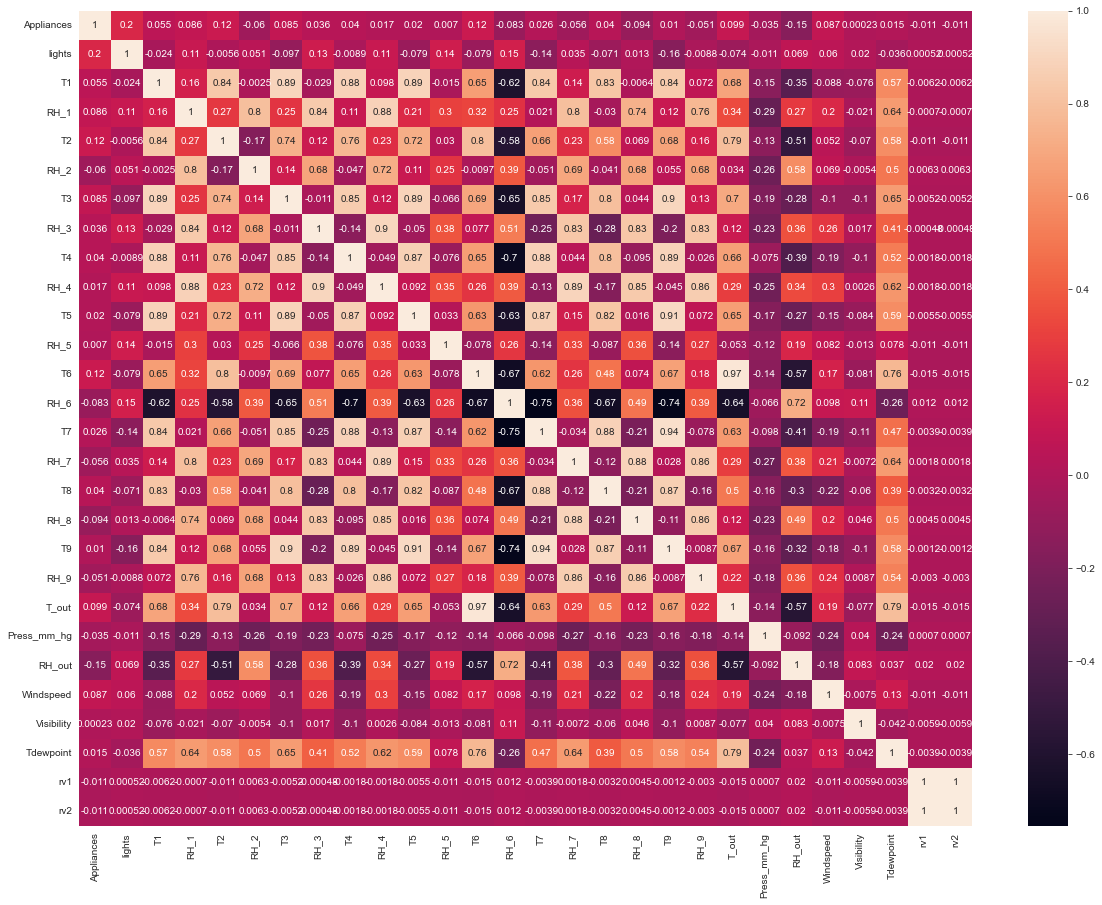

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [12]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [13]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

# sıcaklık değerlerimizin ortalamasını alıyoruz
# nem değerlerimiz için de aynısını yapıyoruz.

In [14]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

# daha sonra ortalamalarını aldıklarımızı attık.

In [15]:
df.info() # en sonki datamız bu şekilde

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [16]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [17]:
df_a = df_a.resample("H").sum() # bunların toplamlarını alıyoruz
df_b = df_b.resample("H").mean() # bunların ortalamalarını alıyoruz
# resample yapıp yapmayacağımıza biz kendimiz karar vereceğiz.
# biz 10 dklik yerine saatlik yapmak istiyoruz datamızı.
# timeseries datalarda kullandığımız resample. Saat olması için H yazıyoruz.
# Ama ordaki verilere ne yapacak toplayacak mı ortalamasını mı alacak...
# Biz enerjilerin toplamlarını alıyoruz
# Sıcaklık, nem, basınç bunların da ortalamalarını alıyoruz.
# resample'ı index'i time olan datalarda kullanıyorum.
# artık saat saat gidiyor.

# bu durunda 144 den 24 düştü period.

In [18]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [19]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [20]:
df = df.round(2)

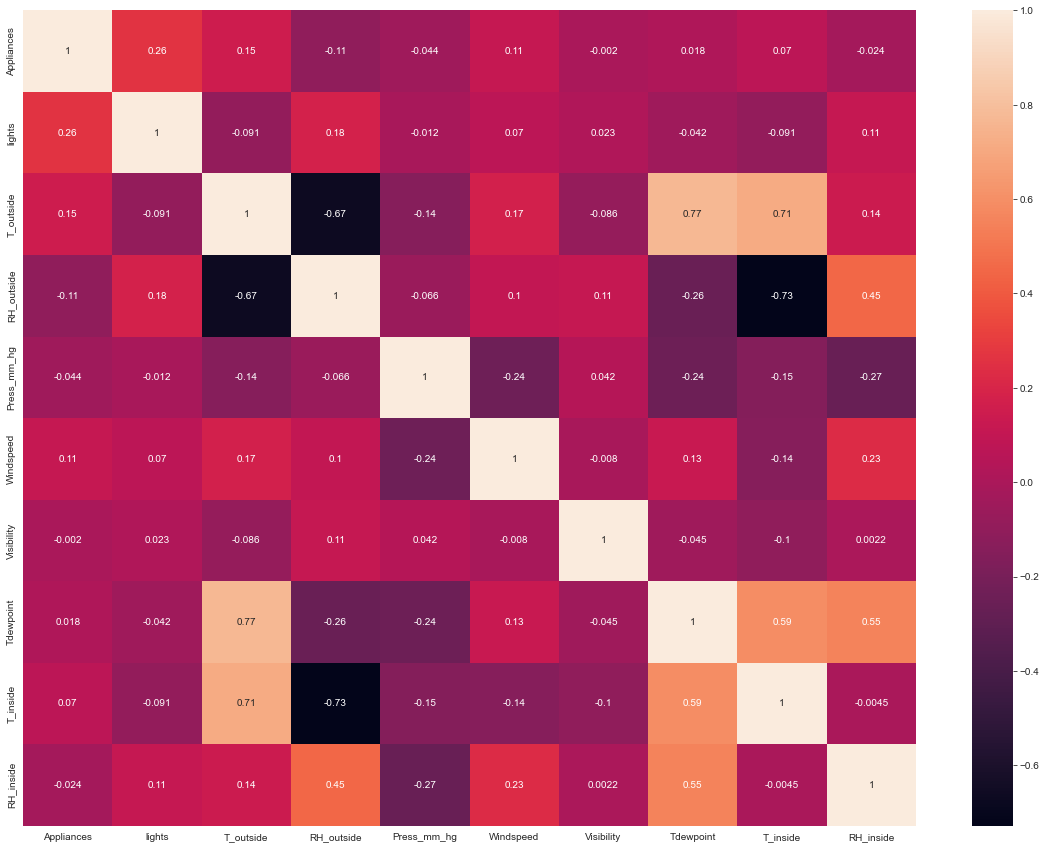

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);
# yaptığımız işlemlerden sonra yüksek corr lar gitti sadece 0.71 gibiler kaldı

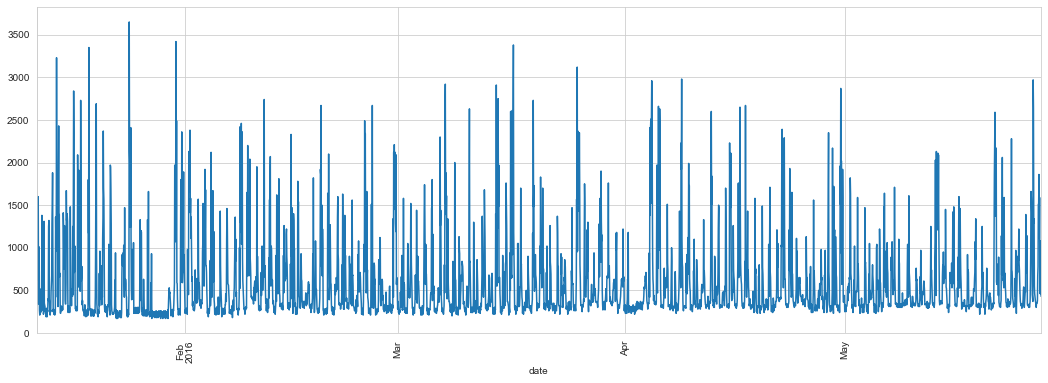

In [22]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

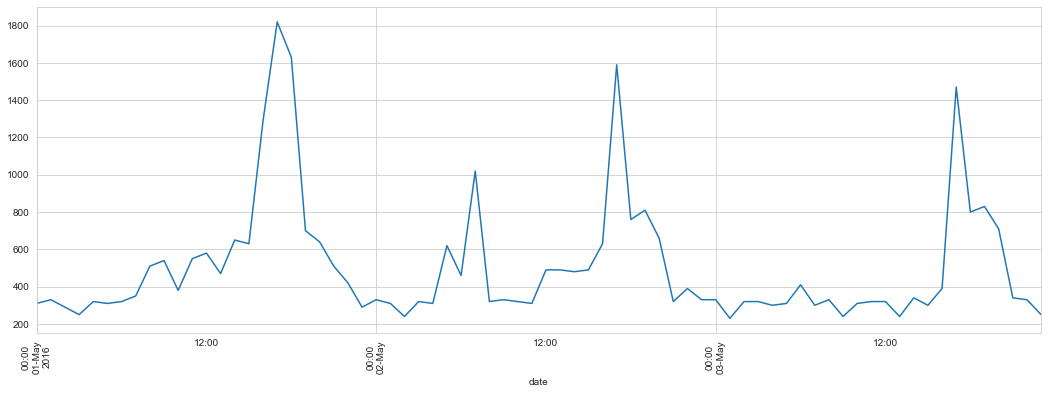

In [23]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

# Öğleden sonra 4 gibi artış olmuş mesela

### Train Test Split

In [24]:
len(df)

3290

In [25]:
# How many rows per day?
24

24

In [26]:
test_days = 7

In [27]:
test_ind = test_days*24

In [28]:
test_ind

168

In [29]:
train = df.iloc[:-test_ind] # sondan 168'e kadar olacağı için böyle bir ayrım yaptım.
test = df.iloc[-test_ind:]

In [30]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

In [31]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [34]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [36]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)  # işleri kısaltıyoruz artık :)

(3122, 3098, 168, 144)

In [37]:
n_features = train_scaled.shape[1] 
# bizim 10 tane featuremız olduğu için n_features 10 verdik

In [38]:
n_features

10

In [41]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features)) # burda farklı olarak dense içine n_features verdik 1 vermek yerine.

model.compile(optimizer='adam', loss='mse')

Aslında nu datamız için çok mantıklı değil timeseries. Çok iyi sonuçlar vermeyecek.

In [42]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [43]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 27s 8ms/step - loss: 0.0089 - val_loss: 0.0062
Epoch 2/10
3098/3098 [==============================] - 26s 8ms/step - loss: 0.0048 - val_loss: 0.0056
Epoch 3/10
3098/3098 [==============================] - 26s 9ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 4/10
3098/3098 [==============================] - 26s 8ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/10
3098/3098 [==============================] - 25s 8ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/10
3098/3098 [==============================] - 25s 8ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 7/10
3098/3098 [==============================] - 26s 8ms/step - loss: 0.0039 - val_loss: 0.0044


<AxesSubplot:>

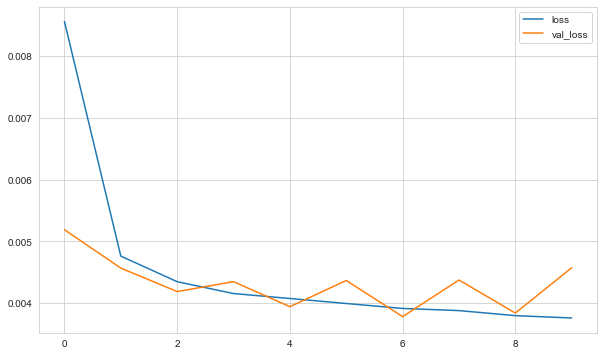

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [39]:
train_scaled

array([[0.04597701, 0.67741935, 0.36747872, ..., 0.53060285, 0.24072217,
        0.72111369],
       [0.25574713, 1.        , 0.35544467, ..., 0.51265532, 0.23971916,
        0.71972158],
       [0.25      , 0.48387097, 0.34605225, ..., 0.5002301 , 0.26780341,
        0.81948956],
       ...,
       [0.03448276, 0.        , 0.79189903, ..., 0.86746434, 0.72016048,
        0.65614849],
       [0.08045977, 0.        , 0.78544174, ..., 0.81316153, 0.73420261,
        0.69605568],
       [0.0862069 , 0.03225806, 0.76342824, ..., 0.75977911, 0.75025075,
        0.80510441]])

In [40]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [41]:
predictions_scaled
# her bir feature'ım için sonuç üretti.

[array([0.02429121, 0.02954107, 0.72951335, 0.03626283, 0.66174084,
        0.30325577, 0.5767891 , 0.740059  , 0.73275375, 0.74179137],
       dtype=float32),
 array([-0.00264253,  0.01850022,  0.6942488 ,  0.09635818,  0.65485805,
         0.26014286,  0.53574663,  0.72342545,  0.7093602 ,  0.6617656 ],
       dtype=float32),
 array([-2.2782154e-02,  2.9160827e-04,  6.6327107e-01,  1.5613215e-01,
         6.4740819e-01,  2.3042071e-01,  5.1834023e-01,  7.0554423e-01,
         6.8411237e-01,  6.2373185e-01], dtype=float32),
 array([-0.03618041, -0.01703547,  0.6332484 ,  0.20767935,  0.64016384,
         0.20633554,  0.50267935,  0.688931  ,  0.6612463 ,  0.60178876],
       dtype=float32),
 array([-0.04910351, -0.03638775,  0.6065153 ,  0.24715513,  0.63247526,
         0.18730786,  0.48750037,  0.6733925 ,  0.6399564 ,  0.5853487 ],
       dtype=float32),
 array([-0.06418447, -0.05813745,  0.58517826,  0.27391037,  0.624544  ,
         0.17240089,  0.47323614,  0.65857124,  0.620114

In [42]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -23.875018666046696 
mae: 0.17595071665034664 
mse: 0.057666773399368355 
rmse: 0.2401390709554952


## Inverse Transformations and Compare

In [43]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
0,254.533,9.158,18.925,4.586,757.755,4.235,38.669,9.601,23.326,46.996
1,160.804,5.735,17.723,10.530,757.460,3.693,36.019,9.240,23.092,45.271
2,90.718,0.090,16.668,16.441,757.141,3.319,34.894,8.851,22.841,44.451
3,44.092,-5.281,15.645,21.539,756.830,3.016,33.883,8.490,22.613,43.979
4,-0.880,-11.280,14.734,25.444,756.501,2.776,32.903,8.153,22.400,43.624
5,-53.362,-18.023,14.007,28.090,756.160,2.589,31.982,7.831,22.203,43.278
6,-111.113,-24.918,13.519,29.495,755.826,2.441,31.171,7.524,22.017,42.899
7,-170.839,-31.257,13.310,29.660,755.512,2.321,30.503,7.236,21.843,42.483
8,-229.922,-36.472,13.416,28.532,755.223,2.221,30.008,6.968,21.682,42.033
9,-288.408,-40.346,13.872,26.040,754.950,2.146,29.713,6.718,21.531,41.548


In [44]:
test_new = test[:length]

In [45]:
for i in test_new.columns:
    print(i)
    eval_metrics(test_new[i], predictions[i])
    print("--"*15)
    
# for döngüsü kırarak test ve predictionları karşılaştırdım

Appliances
r2_score: -1.7365356850288989 
mae: 960.6555640076598 
mse: 1626368.2914477575 
rmse: 1275.2914535304303
------------------------------
lights
r2_score: -24.3491282411937 
mae: 25.520922966922324 
mse: 827.3673800945165 
rmse: 28.76399450866511
------------------------------
T_outside
r2_score: -0.03922150259285795 
mae: 3.6924690749247886 
mse: 27.066640767029636 
rmse: 5.202560981577212
------------------------------
RH_outside
r2_score: 0.024118071141323583 
mae: 19.490398408596715 
mse: 486.92005300411637 
rmse: 22.06626504427327
------------------------------
Press_mm_hg
r2_score: -90.10691954136257 
mae: 8.678878670930908 
mse: 181.31409498355745 
rmse: 13.465292235356701
------------------------------
Windspeed
r2_score: 0.09196947269377409 
mae: 1.5656419520080087 
mse: 3.1995059406877853 
rmse: 1.7887162828933452
------------------------------
Visibility
r2_score: 0.5012420485556386 
mae: 3.60932186792294 
mse: 17.549417726102977 
rmse: 4.189202516721169
-----------

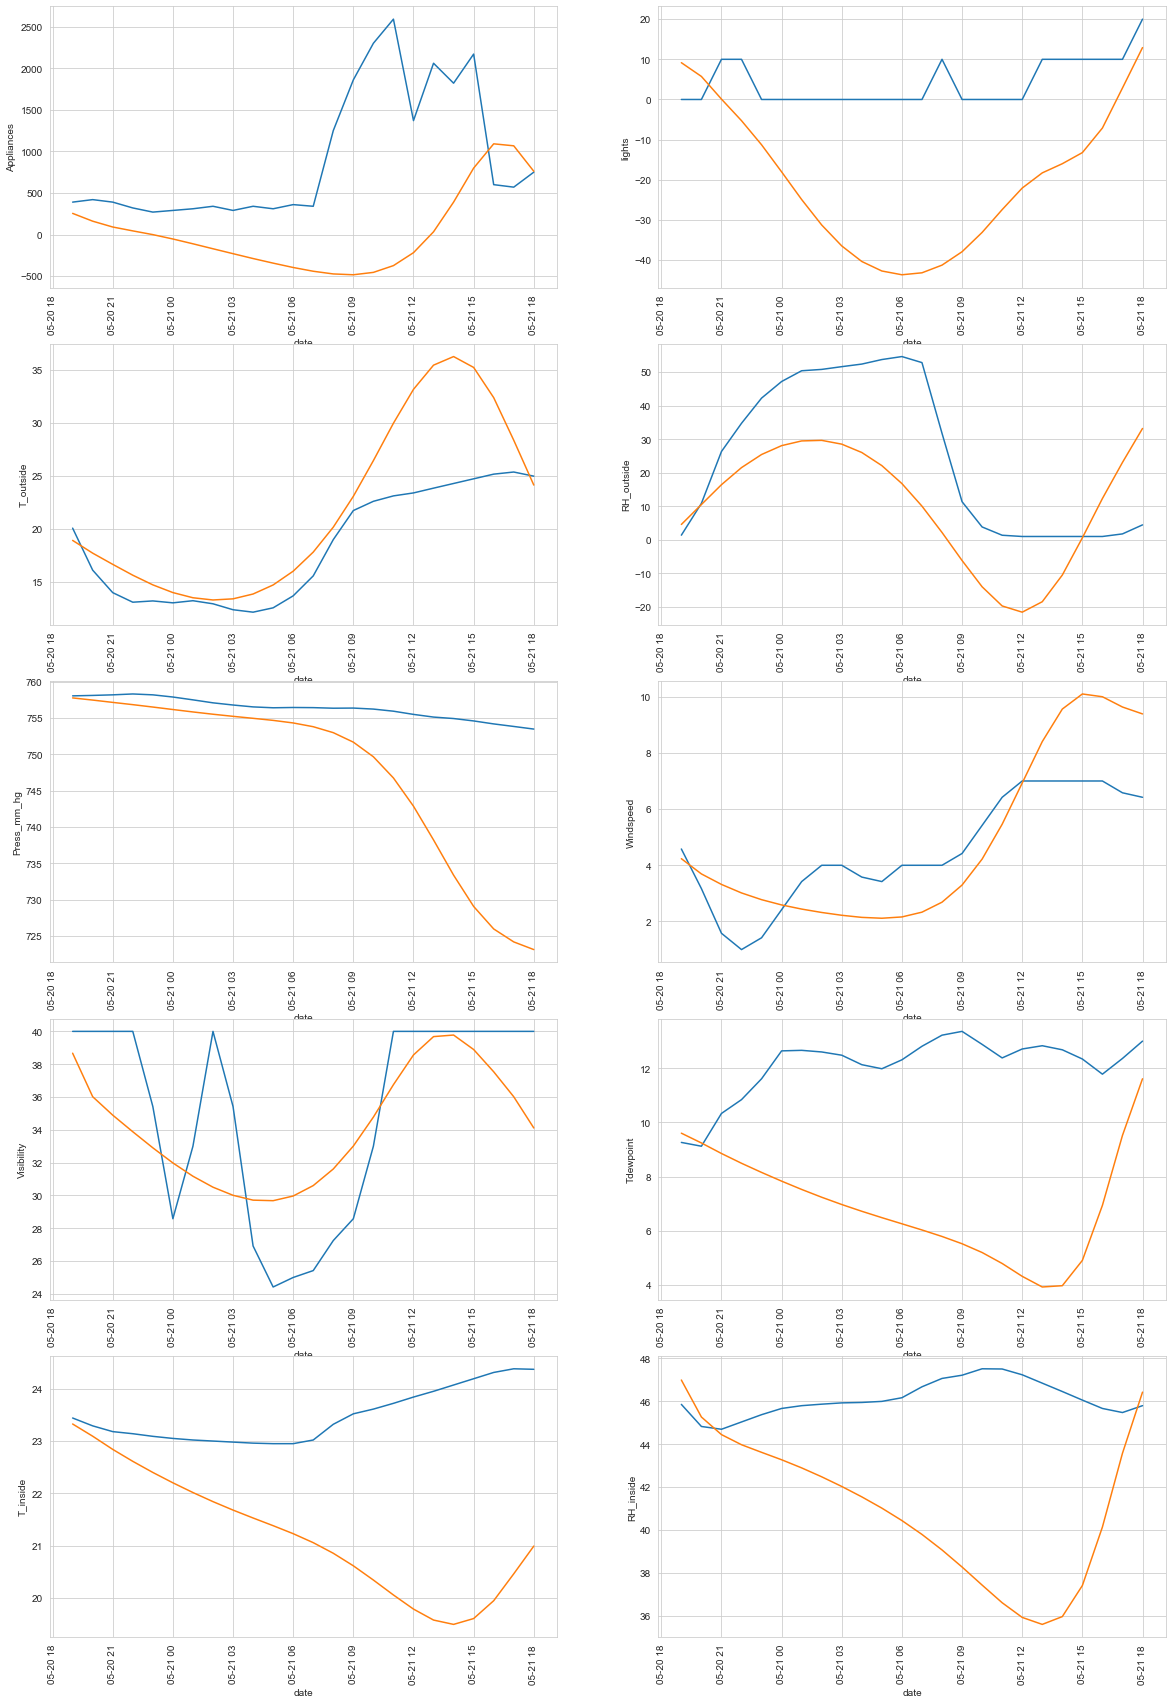

In [46]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i])
    test_eva["predictions"] = predictions[i].values
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);
    
    # doğru düzgün bir şey yapamamış
    # Bizim bir datasetimizde index olarak time olması timeseries data demek değil, seasonaltiy yakalayamayabiliriz.

# Univariate Time Series for Appliances Feature

In [47]:
df_app = df[["Appliances"]]
df_app

,Appliances
date,
2016-01-11 17:00:00,330
2016-01-11 18:00:00,1060
2016-01-11 19:00:00,1040
2016-01-11 20:00:00,750
2016-01-11 21:00:00,620
...,...
2016-05-27 14:00:00,610
2016-05-27 15:00:00,460
2016-05-27 16:00:00,810


### Train Test Split

In [48]:
len(df_app)

3290

In [49]:
# How many rows per day?
24

24

In [50]:
test_days = 7

In [51]:
test_ind = test_days*24

In [52]:
test_ind

168

In [53]:
train = df_app.iloc[:-test_ind]
test = df_app.iloc[-test_ind:]

In [54]:
train.shape, test.shape

((3122, 1), (168, 1))

### Scale Data

In [55]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
scaler.fit(train)

MinMaxScaler()

In [58]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [59]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [60]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [61]:
n_features = train_scaled.shape[1]

In [62]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [63]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [64]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 28s 8ms/step - loss: 0.0135 - val_loss: 0.0130
Epoch 2/10
3098/3098 [==============================] - 25s 8ms/step - loss: 0.0126 - val_loss: 0.0129
Epoch 3/10
3098/3098 [==============================] - 26s 8ms/step - loss: 0.0125 - val_loss: 0.0126
Epoch 4/10
3098/3098 [==============================] - 25s 8ms/step - loss: 0.0123 - val_loss: 0.0129
Epoch 5/10
3098/3098 [==============================] - 26s 8ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 6/10
3098/3098 [==============================] - 25s 8ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 7/10
3098/3098 [==============================] - 25s 8ms/step - loss: 0.0119 - val_loss: 0.0120
Epoch 8/10
3098/3098 [==============================] - 26s 8ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 9/10
3098/3098 [==============================] - 26s 8ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 10/10
3098/3098 [==============================] - 26s 8ms/step - l

<AxesSubplot:>

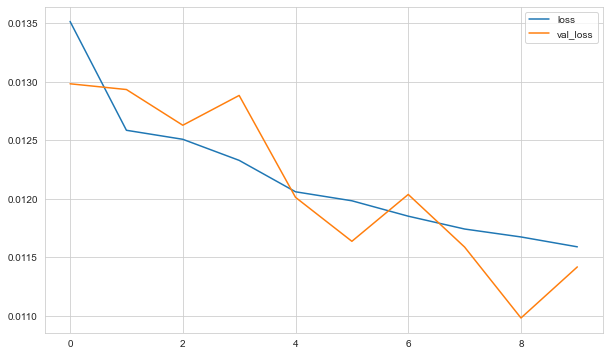

In [65]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [66]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [67]:
predictions_scaled # 24 lük (24 saatlik) predictionlar

[array([0.10943866], dtype=float32),
 array([0.10825793], dtype=float32),
 array([0.10375602], dtype=float32),
 array([0.09899611], dtype=float32),
 array([0.09559233], dtype=float32),
 array([0.09423795], dtype=float32),
 array([0.09555186], dtype=float32),
 array([0.09895038], dtype=float32),
 array([0.1057017], dtype=float32),
 array([0.11221352], dtype=float32),
 array([0.11973707], dtype=float32),
 array([0.1255501], dtype=float32),
 array([0.1292766], dtype=float32),
 array([0.12910357], dtype=float32),
 array([0.12122756], dtype=float32),
 array([0.11412641], dtype=float32),
 array([0.1054775], dtype=float32),
 array([0.09841397], dtype=float32),
 array([0.09284976], dtype=float32),
 array([0.08988315], dtype=float32),
 array([0.08928815], dtype=float32),
 array([0.0919367], dtype=float32),
 array([0.09665107], dtype=float32),
 array([0.10123053], dtype=float32)]

In [68]:
test_scaled[:length] # bunu test datamın ilk 24'ü ile karşılaştıracağım.

array([[0.06321839],
       [0.07183908],
       [0.06321839],
       [0.04310345],
       [0.02873563],
       [0.03448276],
       [0.04022989],
       [0.04885057],
       [0.03448276],
       [0.04885057],
       [0.04022989],
       [0.0545977 ],
       [0.04885057],
       [0.31034483],
       [0.48563218],
       [0.61206897],
       [0.6954023 ],
       [0.34482759],
       [0.54310345],
       [0.47413793],
       [0.57471264],
       [0.12356322],
       [0.11494253],
       [0.16666667]])

In [69]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.24189672681031138 
mae: 0.17049102214703846 
mse: 0.06094593963990269 
rmse: 0.24687231444595542


## Inverse Transformations and Compare

In [70]:
predictions = scaler.inverse_transform(predictions_scaled)

In [71]:
compare = test[:length]

In [72]:
compare['Predictions'] = predictions

In [73]:
compare

,Appliances,Predictions
date,,
2016-05-20 19:00:00,390,550.847
2016-05-20 20:00:00,420,546.738
2016-05-20 21:00:00,390,531.071
2016-05-20 22:00:00,320,514.506
2016-05-20 23:00:00,270,502.661
2016-05-21 00:00:00,290,497.948
2016-05-21 01:00:00,310,502.520
2016-05-21 02:00:00,340,514.347
2016-05-21 03:00:00,290,537.842


<AxesSubplot:xlabel='date'>

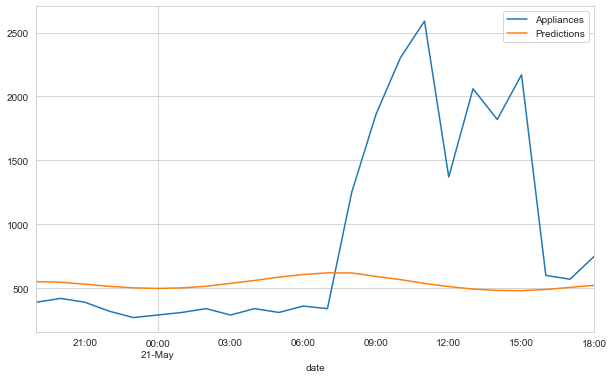

In [74]:
compare.plot()
# zamana göre forecast yapamıyor

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>